任务：基于zgpa_train.csv数据，简历RNN模型，预测股价：
* 数据预处理， 即将序列数据转化为模型可用数据
* 对新数据zgpa_test.csv进行预测，可视化结果
* 存储预测结果，观察局部预测结果
备注：单层RNN，输出5个神经元；每次使用前8个数据预测第九个数据

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('../data/zgpa_train.csv')
data.head()

,date,open,high,low,close,volume
0,2016-01-04,30.57,30.57,28.63,28.78,70997200
1,2016-01-05,28.41,29.54,28.23,29.23,87498504
2,2016-01-06,29.03,29.39,28.73,29.26,48012112
3,2016-01-07,28.73,29.25,27.73,28.50,23647604
4,2016-01-08,28.73,29.18,27.63,28.67,98239664


In [2]:
price = data.loc[:, 'close']
price.head()

0    28.78
1    29.23
2    29.26
3    28.50
4    28.67
Name: close, dtype: float64

In [3]:
price_norm = price/max(price)
price_norm.head()

0    0.383273
1    0.389266
2    0.389666
3    0.379545
4    0.381808
Name: close, dtype: float64

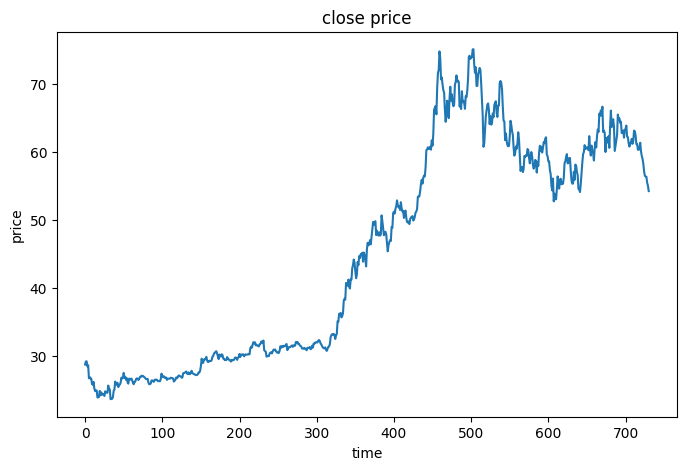

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(8,5))
plt.plot(price)
plt.title('close price')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

In [5]:
#define X and y
#define method to extract X and y
def extract_data(data ,time_step):
    X = []
    y = []
    #0,1,2,3...9:10个样本; time_step=8;0,1...7;1,2...8;2,3...9三组（两组样本)
    for i in range(len(data)-time_step):
        X.append([a for a in data[i:i+time_step]])
        y.append(data[i+time_step])
    X = np.array(X)
    X = X.reshape(X.shape[0], X.shape[1], 1)
    return X, y

In [6]:
time_step = 8

In [12]:
X,y = extract_data(price_norm, time_step=time_step)
print(X.shape)    # [723, 8, 1]
# print(y.shape)

(723, 8, 1)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

ModuleNotFoundError: No module named 'tensorflow'